In [1]:
import  gymnasium as gym
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
from tqdm import tqdm
from memory import RandomReplayMemory, PrioritizedReplayMemory
from gridWorldEnv import GridWorldEnv
from train import Agent
from pathos.multiprocessing import ProcessingPool as Pool

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


/Users/navidhassanzadeh/miniconda3/lib/python3.11/site-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [2]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [10]:
def env_changes(env, ep_num):
    if ep_num in [199, 698, 998]: #[20, 100, 250, 300, 301, 302, 310, 400, 500, 690, 700, 701, 702, 703, 710, 900, 998]:
        env.render_mode= "human"
    else:
        env.render_mode=None

    if ep_num == 0:
        env.switch_doors(top_door="open",bottom_door="close")
        print("door_changed")
    elif ep_num == 300:
        env.switch_doors(top_door="close",bottom_door="open")
        print("door_changed")
    elif ep_num == 700:
        env.switch_doors(top_door="open",bottom_door="close")
        print("door_changed")



parameters_random = {
        "gamma": 0.99,
        "lr": 5e-4,
        "TAU": 0.01,
        "episode_num": 200,
        "batch_size": 64,
        "epsilon_max": 0.1,
        "epsilon_min": 0.1,
        "device": device,
        "max_episode_len": 200,
        "non_stationarity": True,
        "env_changes": env_changes,
        "env": GridWorldEnv(size=10), #render_mode= "human", 
        # "env":  gym.make("CartPole-v1"),
        "buffer": RandomReplayMemory(buffer_size= 200_000, device = device),
        # "buffer": PrioritizedReplayMemory(buffer_size= 200_000, device = device, alpha=0.7, beta=0.2)
        }


parameters_prioritized = {
        "gamma": 0.99,
        "lr": 5e-4,
        "TAU": 0.01,
        "episode_num": 1000,
        "batch_size": 64,
        "epsilon_max": 0.1,
        "epsilon_min": 0.1,
        "device": device,
        "max_episode_len": 200,
        "non_stationarity": True,
        "env_changes": env_changes,
        "env": GridWorldEnv(size=10), #render_mode= "human", 
        # "env":  gym.make("CartPole-v1"),
        # "buffer": RandomReplayMemory(buffer_size= 5_000, device = device),
        "buffer": PrioritizedReplayMemory(buffer_size= 200_000, device = device, alpha=0.7, beta=0.2)
        }

In [11]:
agent = Agent(**parameters_random)
agent.train()

episode:0, ep_length:200, acc_reward:0.0, loss:0.00010636330989655107
episode:1, ep_length:200, acc_reward:0.0, loss:1.0846871191461105e-05
episode:2, ep_length:200, acc_reward:0.0, loss:9.325930477643851e-06
episode:3, ep_length:200, acc_reward:0.0, loss:1.7006317648338154e-05
episode:4, ep_length:88, acc_reward:0.41712087993322045, loss:2.7860518457600847e-05
episode:5, ep_length:16, acc_reward:0.8600583546412883, loss:1.7512040358269587e-05
episode:6, ep_length:26, acc_reward:0.7778213593991465, loss:0.00011622911551967263
episode:7, ep_length:55, acc_reward:0.5811664141181095, loss:0.0004656048840843141
episode:8, ep_length:200, acc_reward:0.0, loss:0.00022464369249064475
episode:9, ep_length:200, acc_reward:0.0, loss:0.0006528915255330503
episode:10, ep_length:15, acc_reward:0.8687458127689781, loss:0.0003943514602724463
episode:11, ep_length:23, acc_reward:0.8016305895390458, loss:0.00029527119477279484
episode:12, ep_length:19, acc_reward:0.8345137614500874, loss:0.0029973064083

([200,
  200,
  200,
  200,
  88,
  16,
  26,
  55,
  200,
  200,
  15,
  23,
  19,
  17,
  21,
  14,
  13,
  22,
  15,
  23,
  17,
  11,
  11,
  13,
  17,
  187,
  13,
  11,
  12,
  11,
  11,
  11,
  16,
  11,
  11,
  11,
  11,
  12,
  13,
  15,
  12,
  11,
  23,
  11,
  15,
  16,
  13,
  16,
  14,
  14,
  15,
  19,
  15,
  22,
  17,
  31,
  82,
  60,
  11,
  26,
  34,
  26,
  52,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  93,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,
  11,
  23,
  44,
  14,
  11,
  18,
  14,
  16,
  18,
  20,
  20,
  35,
  12,
  12,
  12,
  26,
  12,
  12,
  21,
  13,
  22,
  88,
  169,
  127,
  200,
  33,
  85,
  139,
  27,
  50,
  15,
  32,
  21,
  14,
  16,
  23,
  16,
  27,
  22,
  25,
  25,
  12,
  17,
  13,
  15,
  19,
  19,
  42,
  21,
  33,
  20,
  14,
  16,
  15,
  20,
  18,
  28,
  16,
  17,
  17,
  14,
  24,
  

In [4]:
def parallelied_run(params):
    from train import Agent
    agent = Agent(**params)
    return agent.train()

In [5]:
with Pool() as p:
    parameters_parallel = [parameters_random for i in range(15)] + [parameters_prioritized for i in range(15)]
    return_data = p.map(parallelied_run, parameters_parallel)

In [ ]:
return_data_np = np.array(return_data)
np.save("return_data_test_3_2_non_stationarity",return_data_np)

In [3]:
return_data_np = np.load("return_data_test_3_2_non_stationarity.npy")

In [4]:
return_data_np.shape

(30, 3, 1000)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_runs = 15
num_episodes = 1000

algorithm1_rewards = return_data_np[0:num_runs,2]
algorithm2_rewards = return_data_np[num_runs:2*num_runs,2]


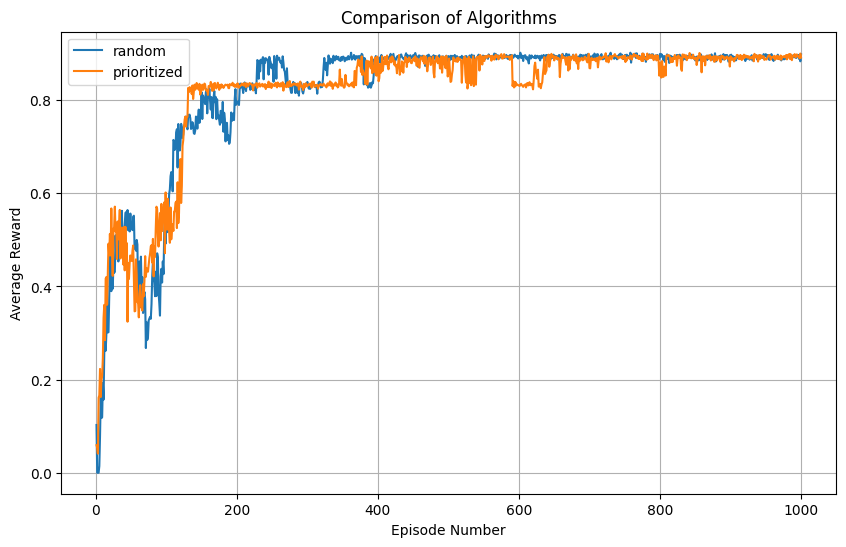

In [10]:

# Calculate average rewards for each episode
avg_algorithm1_rewards = np.mean(algorithm1_rewards, axis=0)
avg_algorithm2_rewards = np.mean(algorithm2_rewards, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), avg_algorithm1_rewards, label='random')
plt.plot(range(1, num_episodes + 1), avg_algorithm2_rewards, label='prioritized')
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of Algorithms')
plt.legend()
plt.grid(True)
plt.show()
